In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [3]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [4]:
df.loc[df['Price'] == '$389.99']
df.loc[df['Price'] == '$394.99']
df.loc[df['Price'] == '$109.99']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Fix null/NaN values

In [5]:
print('Feature types: ')
print(df.dtypes)
print()

print('Null features: ')
print(df.isnull().sum())
print()

print('Dataframe shape: ', df.shape)
print()

Feature types: 
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Null features: 
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Dataframe shape:  (10841, 13)



In [6]:
#we will fill NaN with mean value of Ratings
df.mean()

Rating    4.193338
dtype: float64

In [7]:
fill = {"Rating" : 4.2}
df = df.fillna(value=fill)

print('Null features: ')
print(df.isnull().sum())
print()

Null features: 
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64



In [8]:
#df = df.dropna()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print('Null features: ')
print(df.isnull().sum())
print()

print('Dataframe shape: ', df.shape)
print()

Null features: 
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Dataframe shape:  (10829, 13)



#### Change data types from object to numerical type

In [9]:
# Install: Get rid of + sign and change the type to int.
series_one = pd.Series(df['Installs']) 
for i in range(len(series_one)):
    series_one[i] = series_one[i].strip("+").replace(",", "")
df["Installs"] = df["Installs"].astype(int)

In [10]:
# Price: Get rid of $ sign and change the type to float
series_two = pd.Series(df['Price']) 
for i in range(len(series_two)):
    series_two[i] = series_two[i].strip("$")
df["Price"] = df["Price"].astype(float)

#### Visualization

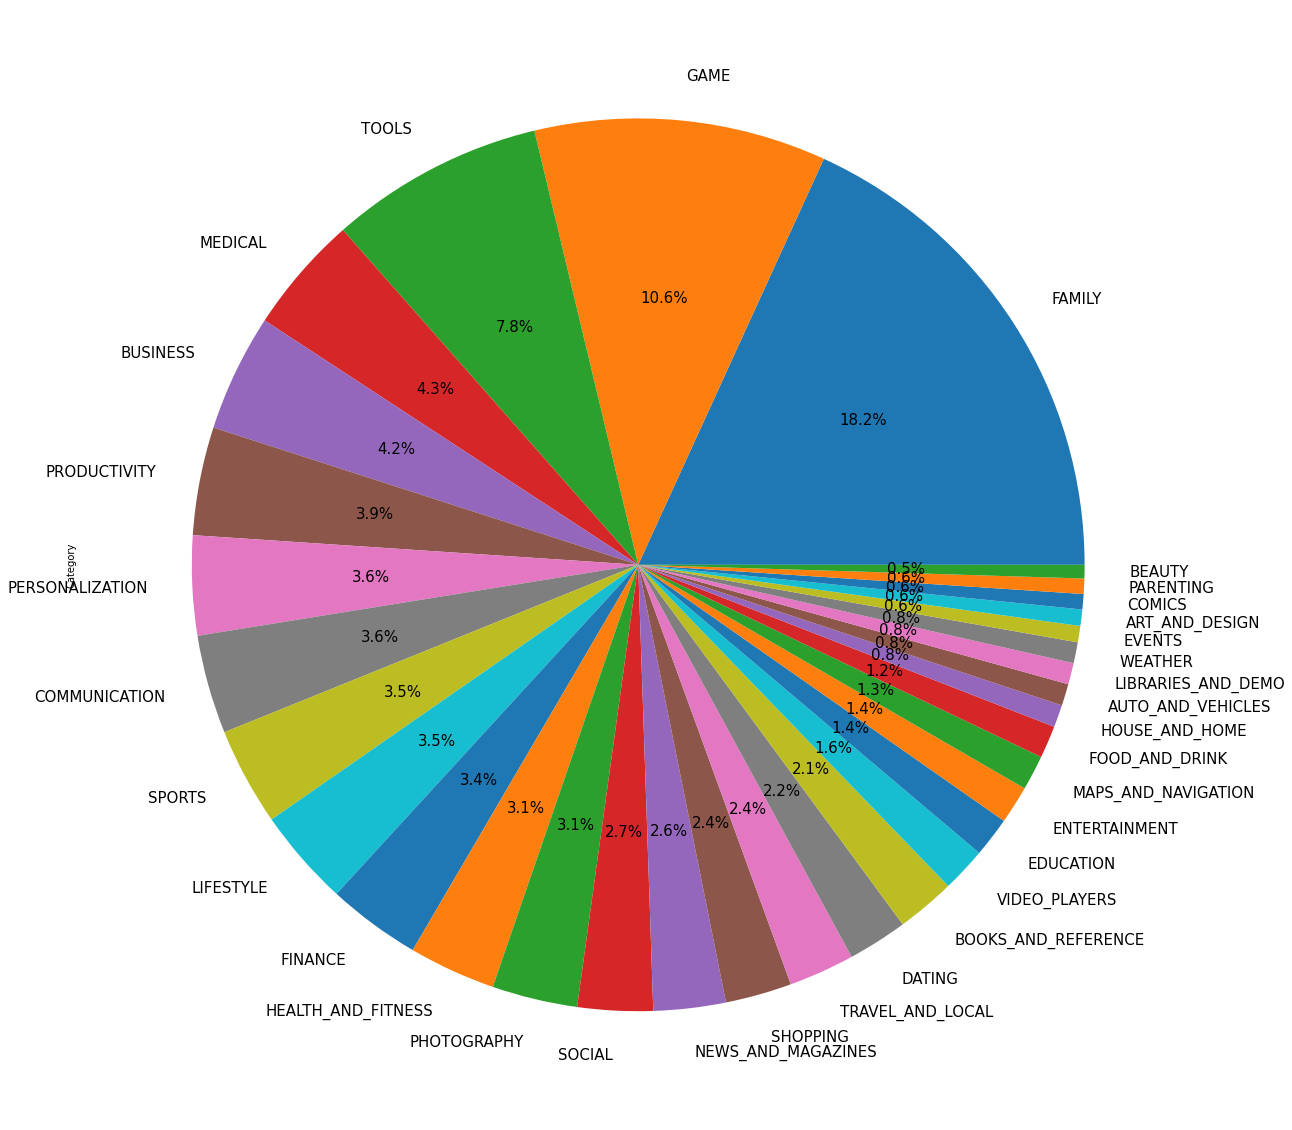

In [11]:
# Number of apps based off Category 
df["Category"].value_counts().plot.pie(figsize=(20,25), fontsize = 15, autopct='%1.1f%%')

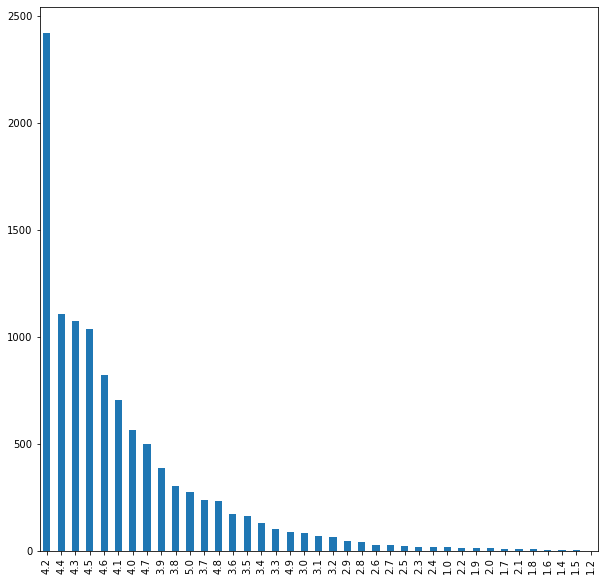

In [12]:
df["Rating"].value_counts().plot.bar(figsize=(10,10))

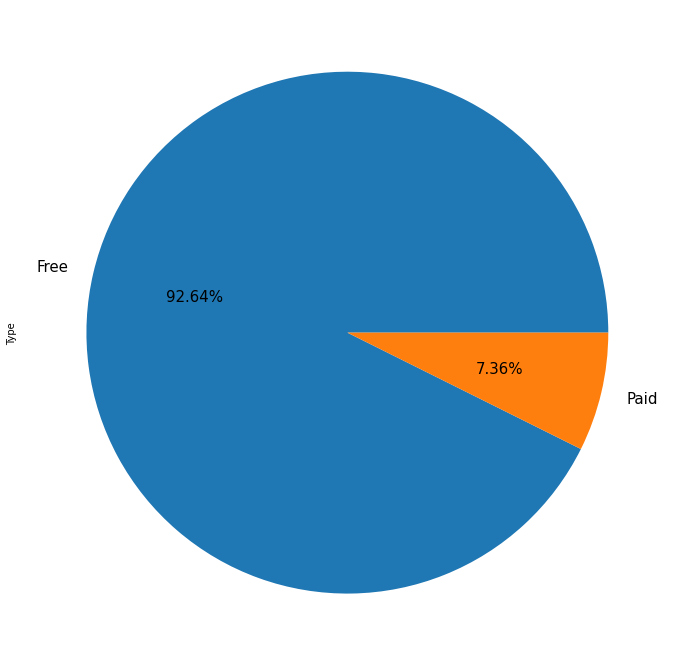

In [13]:
df["Type"].value_counts().plot.pie(figsize=(12,12), fontsize = 15, autopct='%0.2f%%', )

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


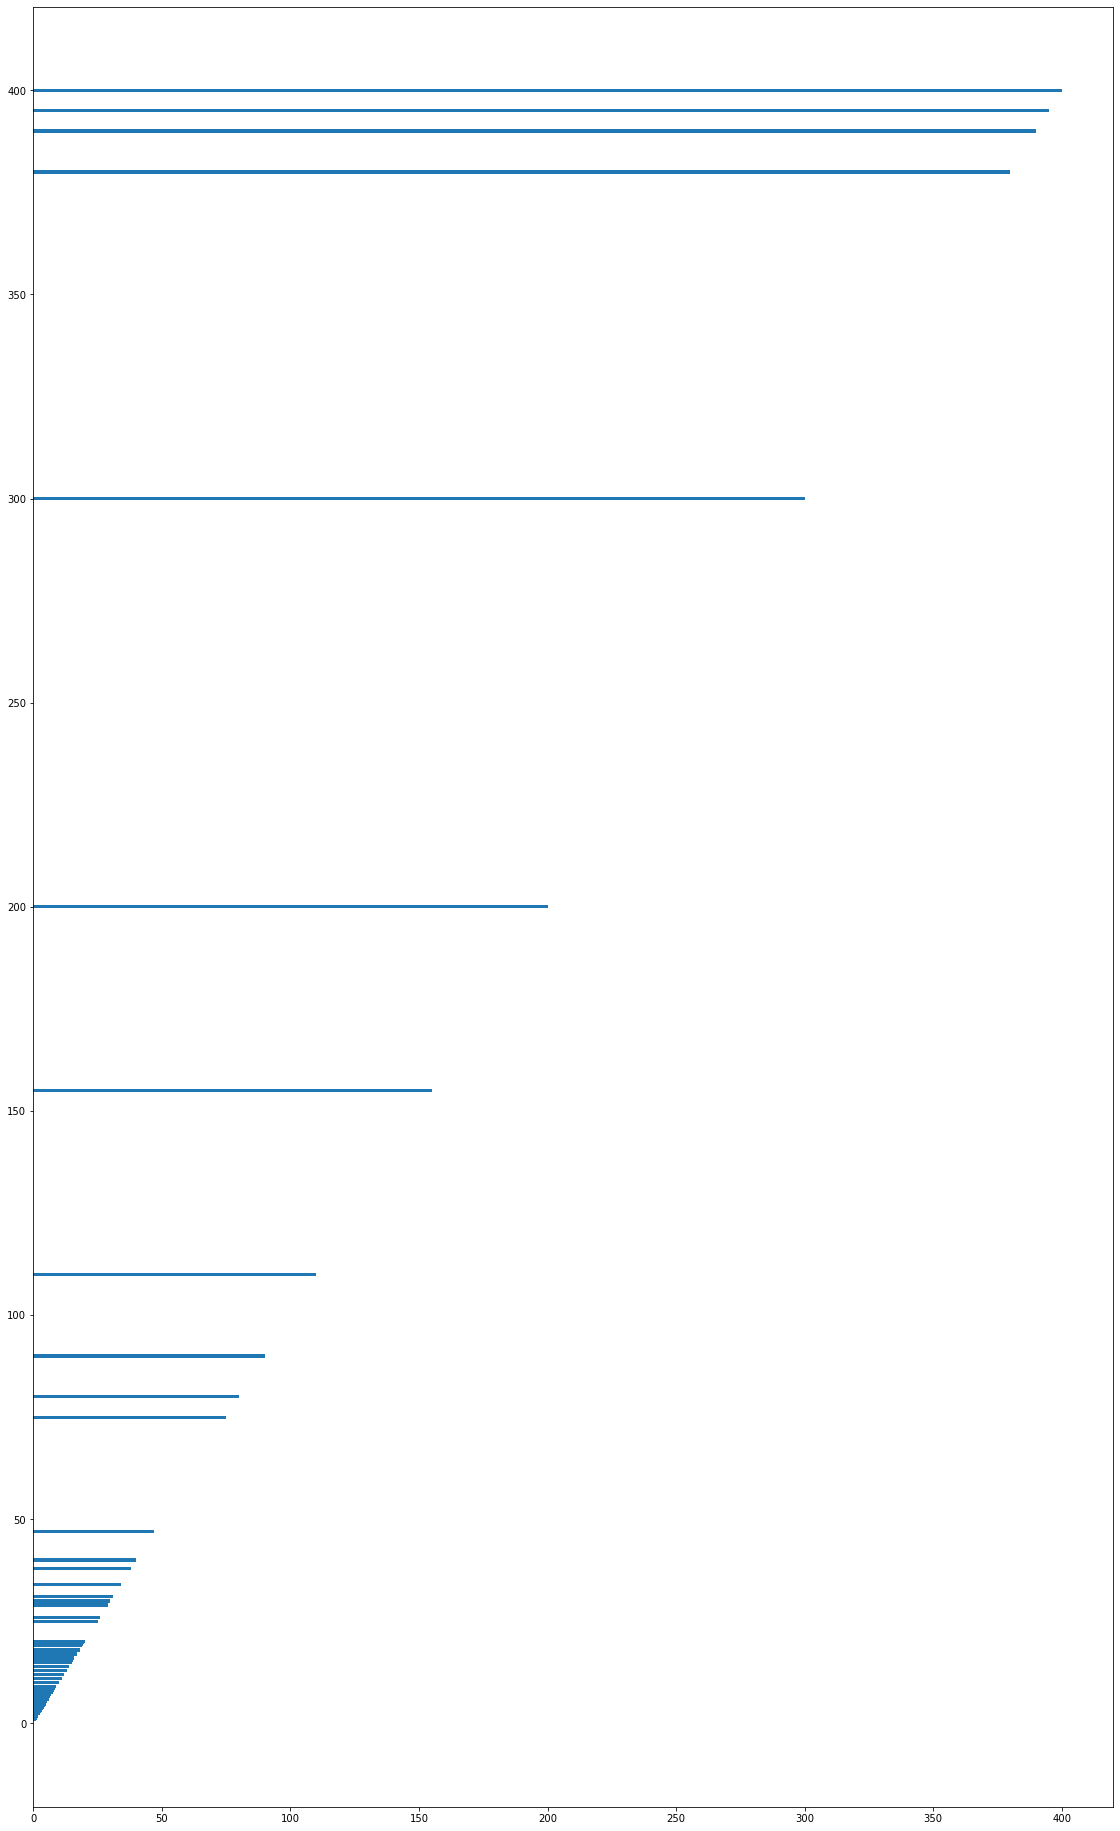

In [15]:
temp = df['Price']
price = sorted(temp, reverse = True)
fig = plt.figure(figsize=(15,25))
ax = fig.add_axes([0,0,1,1])
ax.barh(price,price)
plt.show()

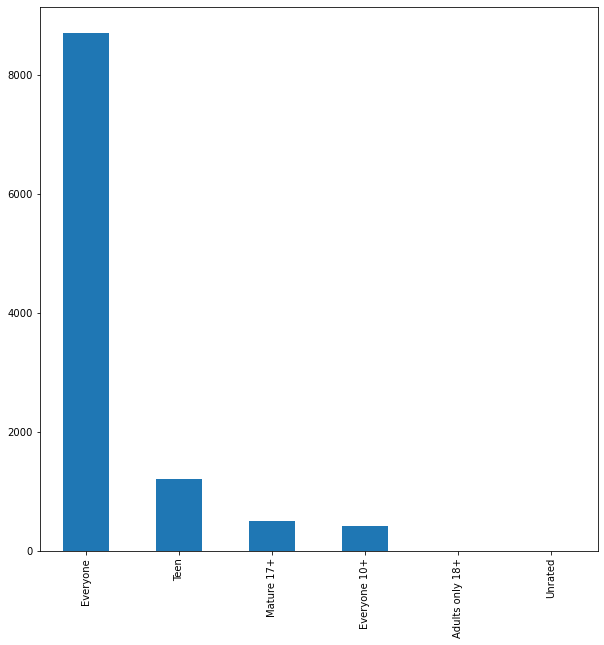

In [16]:
df["Content Rating"].value_counts().plot.bar(figsize=(10,10))

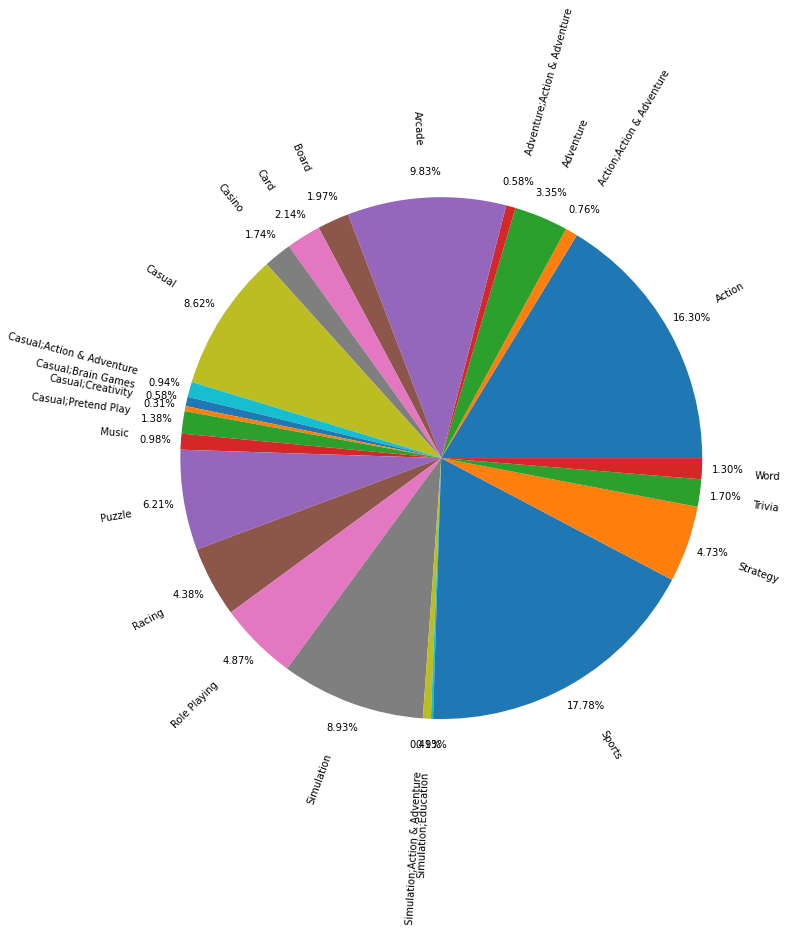

In [17]:
gamesArr = []
for i in range(len(df['Category'])):
    if df['Category'][i] == 'GAME':
        value = df['Genres'][i]
        if value not in gamesArr:
            gamesArr.append(value)
            
gameValues = np.zeros(len(gamesArr))
gamesArrNew = sorted(gamesArr)
            
temp = {}
for i in range(len(gamesArrNew)):
    temp[gamesArrNew[i]] = i

for i in range(len(df['Genres'])):
    if df['Genres'][i] in gamesArrNew:
        value = df['Genres'][i]
        num = temp[value]
        gameValues[num] = gameValues[num] + 1
        
plt.pie(gameValues, labels=gamesArrNew, radius=3, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()

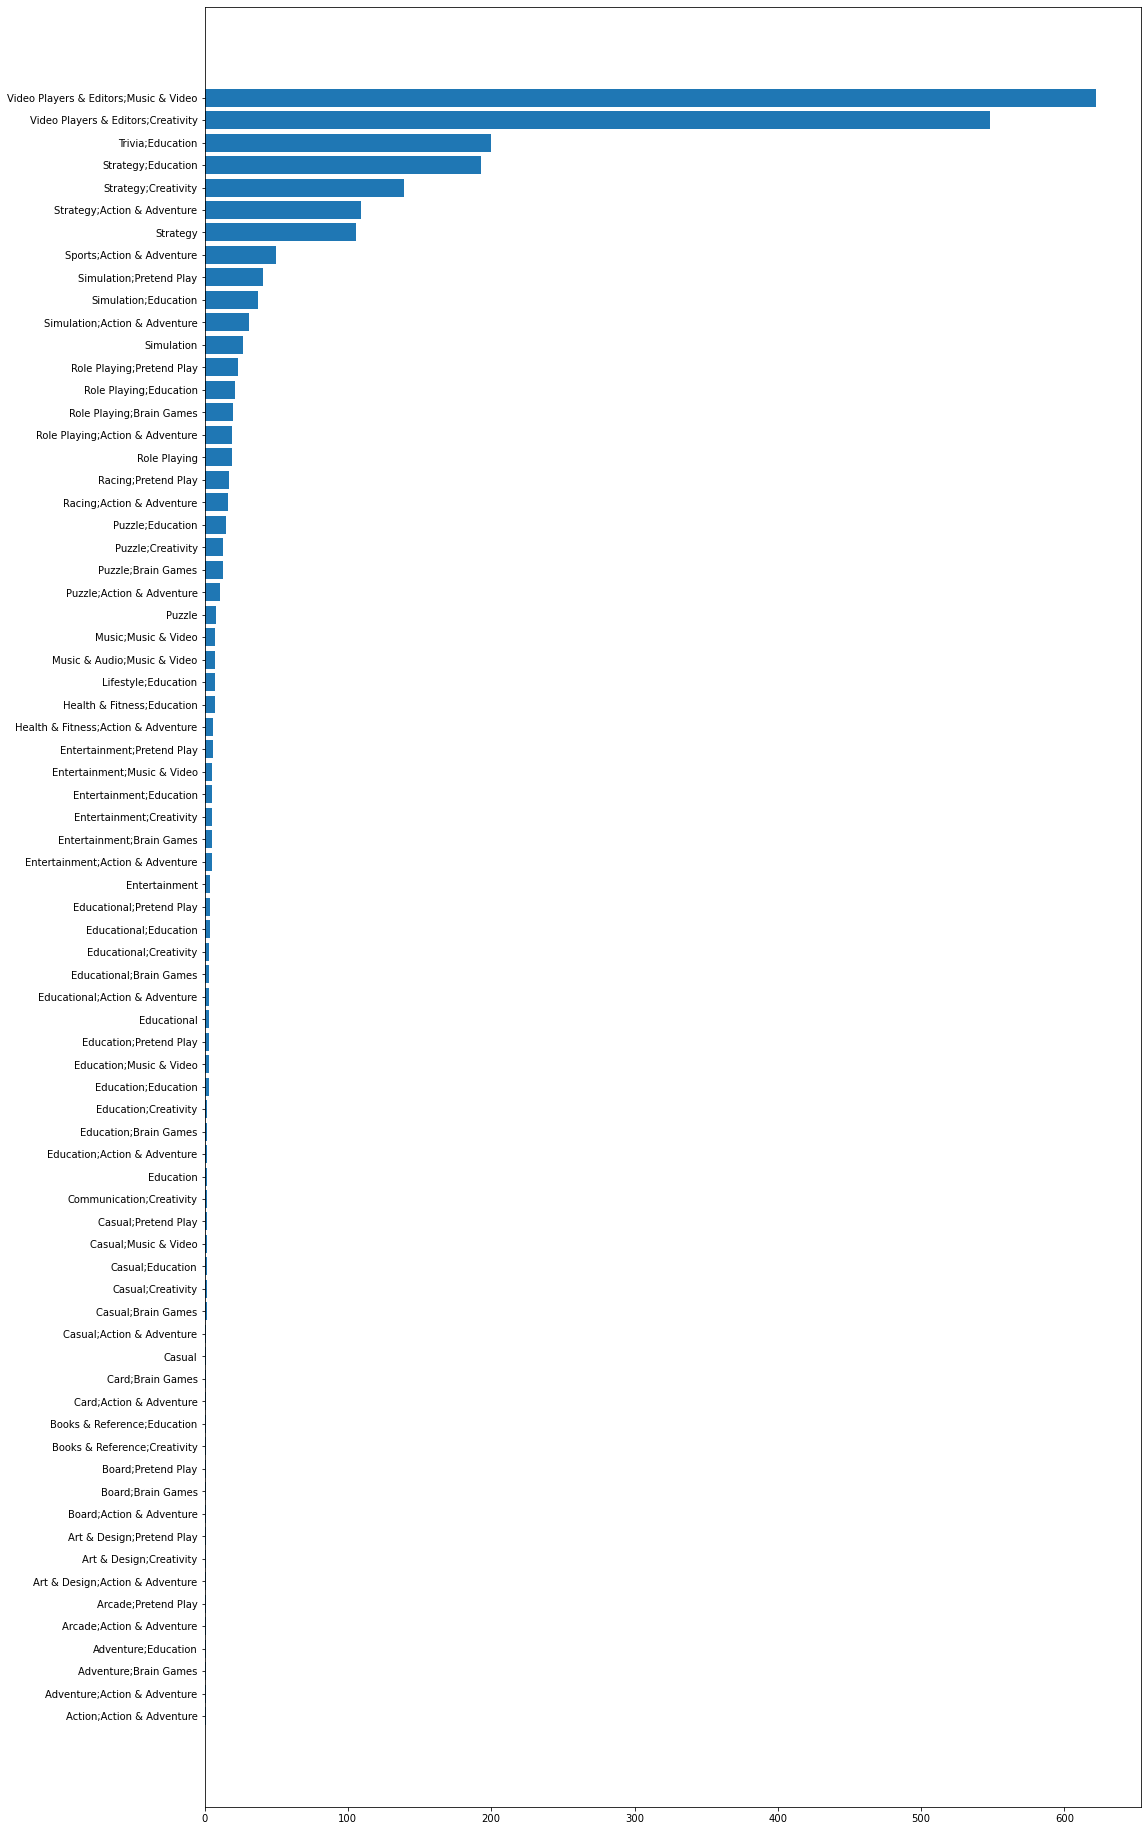

In [18]:
familyArr = []
for i in range(len(df['Category'])):
    if df['Category'][i] == 'FAMILY':
        value = df['Genres'][i]
        if value not in familyArr:
            familyArr.append(value)
            
familyValues = np.zeros(len(familyArr))
#labels_games = sorted(familyArr)
familyArrNew = sorted(familyArr)
            
temp = {}
for i in range(len(familyArrNew)):
    temp[familyArrNew[i]] = i

for i in range(len(df['Genres'])):
    if df['Genres'][i] in familyArrNew:
        value = df['Genres'][i]
        num = temp[value]
        familyValues[num] = familyValues[num] + 1

fig = plt.figure(figsize=(13,25))
ax = fig.add_axes([0,0,1,1])
familyValues = sorted(familyValues)
ax.barh(familyArrNew,familyValues)
plt.show()

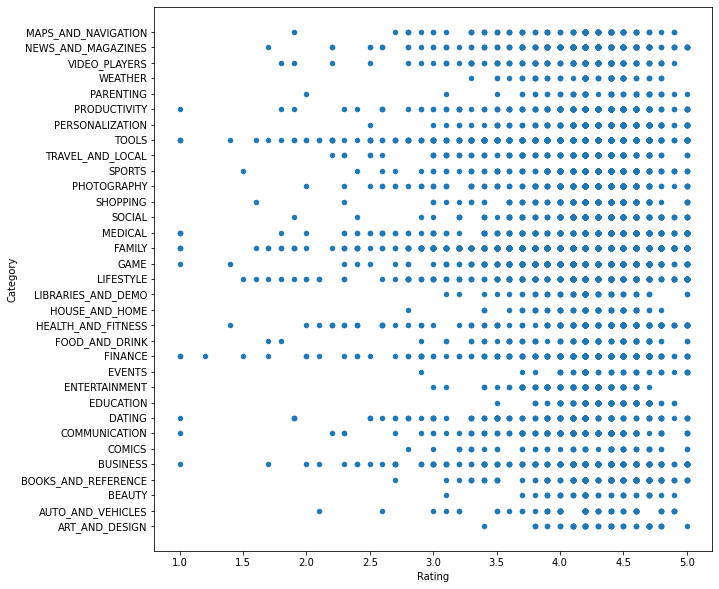

In [19]:
df.plot.scatter(x='Rating', y='Category', figsize=(10,10))

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


The lower the Rating the lower the amount of Reviews. The 4.0-4.5 range has the most number of reviews. 

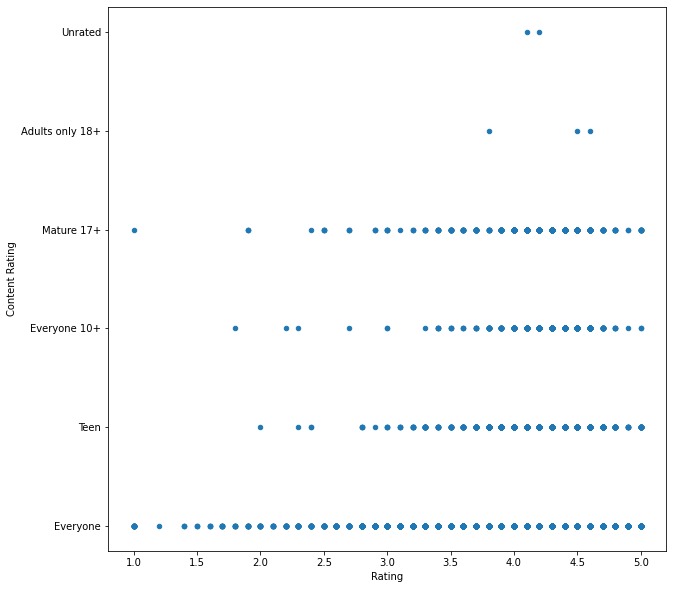

In [21]:
df.plot.scatter(x='Rating', y='Content Rating', figsize=(10,10))

In [22]:
df["Reviews"].value_counts(0)

0         594
1         271
2         214
3         175
4         137
         ... 
7664        1
23013       1
697939      1
87919       1
28660       1
Name: Reviews, Length: 5999, dtype: int64

In [23]:
df["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

#### Change data types from object to numerical type

In [24]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10825,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10826,Parkinson Exercices FR,MEDICAL,4.2,3,9.5M,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10827,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [25]:
print('Feature types: ')
print(df.dtypes)

Feature types: 
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [26]:
df_clean = df

In [27]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

# App: Using Label Encoder change the type from object to int64
df_clean['App'] = lab_enc.fit_transform(df['App'])

# Category: Using Label Encoder change the type from object to int64
df_clean['Category'] = lab_enc.fit_transform(df['Category'])

# Genres: Using Label Encoder change the type from object to int64
df_clean['Genres'] = lab_enc.fit_transform(df['Genres'])

# Content Rating: Object to int64
content_rating = {"Content Rating":     {"Unrated": 0, "Everyone": 1,
                                         "Everyone 10+": 2,"Teen": 3,  
                                         "Mature 17+": 4, "Adults only 18+": 5}}
df_clean.replace(content_rating, inplace=True)

# Review: Object to int64
df_clean["Reviews"] = df["Reviews"].astype(int)
df_clean["Reviews"].dtype

dtype('int64')

In [28]:
# Size: Strip k and m and change the type to float64
series_three = pd.Series(df_clean['Size']) 
k = 'k'
m = 'M'
for i in range(len(series_three)):
    if k in series_three[i]:
        series_three[i] = series_three[i].strip('k')
        f = float(series_three[i])
        series_three[i] = f*.001
    elif m in series_three[i]:
        series_three[i] = series_three[i].strip('M')
        f = float(series_three[i])
        series_three[i] = f
    else:
        #for the case that says varies with device
        series_three[i] = 0    
df_clean["Size"] = df_clean["Size"].astype(float)

In [29]:
# Type: Object to int64
cleanup_type = {"Type":     {"Free": 0, "Paid": 1}}
df_clean.replace(cleanup_type, inplace=True)

In [30]:
print('Feature types: ')
print(df_clean.dtypes)

Feature types: 
App                 int64
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [31]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6955,0,4.1,159,19.0,10000,0,0.0,1,9,7-Jan-18,1.0.0,4.0.3 and up
1,2630,0,3.9,967,14.0,500000,0,0.0,1,12,15-Jan-18,2.0.0,4.0.3 and up
2,8648,0,4.7,87510,8.7,5000000,0,0.0,1,9,1-Aug-18,1.2.4,4.0.3 and up
3,7819,0,4.5,215644,25.0,50000000,0,0.0,3,9,8-Jun-18,Varies with device,4.2 and up
4,7014,0,4.3,967,2.8,100000,0,0.0,1,11,20-Jun-18,1.1,4.4 and up


In [32]:
import seaborn as sns

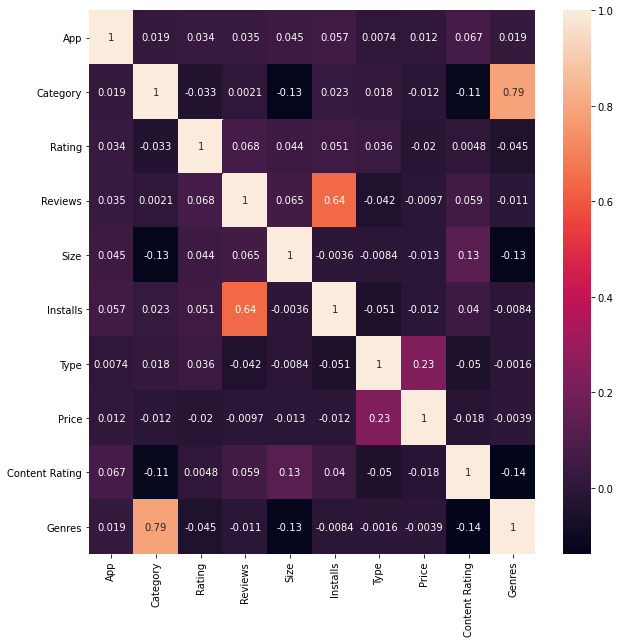

In [33]:
df_matrix = pd.DataFrame(df_clean,columns=['App','Category','Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres'])

fig, ax = plt.subplots(figsize=(10,10))
corrMatrix = df_matrix.corr()
#sns.heatmap(corrMatrix, annot=True, ax=ax)
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()
#print (corrMatrix)

The correlation matrix shows us that there is a significant correlation between:
Installs vs. Reviews -> 0.64
Genre vs. Category   -> 0.79
Price vs. Type       -> 0.23




In [34]:
from scipy import stats 

In [35]:
#z = np.abs(stats.zscore(df['Rating']))
z = np.abs(stats.zscore(df_matrix))
print(z)

[[0.74138616 2.00279445 0.19402985 ... 0.06442869 0.46440996 1.69278492]
 [0.81535595 2.00279445 0.61154585 ... 0.06442869 0.46440996 1.60088616]
 [1.3507652  2.00279445 1.05851815 ... 0.06442869 0.46440996 1.69278492]
 ...
 [0.71583039 0.39191238 0.01472815 ... 0.06442869 0.46440996 0.20645609]
 [1.25646083 1.64358843 0.64100215 ... 0.06442869 3.01513022 1.38645573]
 [1.64843589 0.1524417  0.64100215 ... 0.06442869 0.46440996 0.08392441]]


In [36]:
threshold = 3
print(np.where(z>3))

(array([  128,   132,   133, ..., 10786, 10814, 10827]), array([8, 8, 8, ..., 6, 8, 8]))


In [37]:
print(z[128][8])

3.015130222917661


In [38]:
df_matrix.shape

(10829, 10)

In [39]:
df_outlies = df_matrix[(z < 3).all (axis=1)]

In [40]:
df_outlies.shape

(8989, 10)

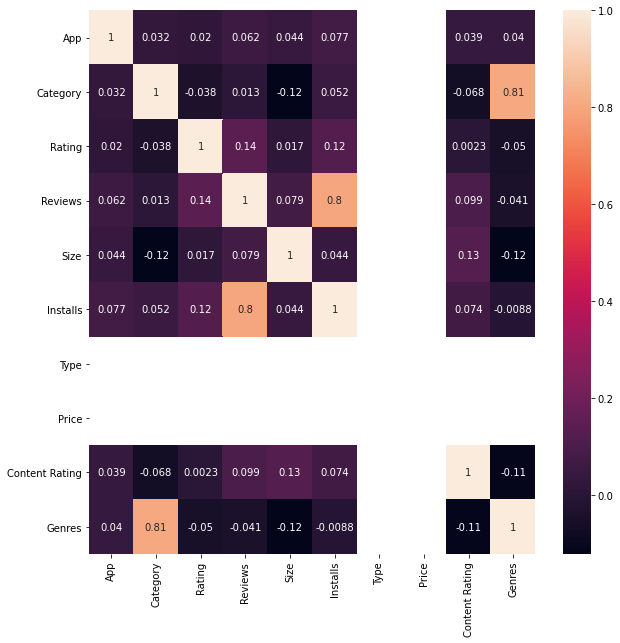

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
corrMatrix = df_outlies.corr()
#sns.heatmap(corrMatrix, annot=True, ax=ax)
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()
#print (corrMatrix)

The correlation matrix shows us that there is a significant correlation between:
Installs vs. Reviews -> 0.8
Genre vs. Category   -> 0.81


In [42]:
df_outlies.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6955,0,4.1,159,19.0,10000,0,0.0,1,9
1,2630,0,3.9,967,14.0,500000,0,0.0,1,12
2,8648,0,4.7,87510,8.7,5000000,0,0.0,1,9
3,7819,0,4.5,215644,25.0,50000000,0,0.0,3,9
4,7014,0,4.3,967,2.8,100000,0,0.0,1,11
5,6871,0,4.4,167,5.6,50000,0,0.0,1,9
6,7872,0,3.8,178,19.0,50000,0,0.0,1,9
7,5374,0,4.1,36815,29.0,1000000,0,0.0,1,9
8,4800,0,4.4,13791,33.0,1000000,0,0.0,1,9
9,5587,0,4.7,121,3.1,10000,0,0.0,1,11


In [43]:
###############################################################################################################

In [44]:
###################################       K Means Clustering?            #######################################

In [45]:
df2 = df_clean[['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Rating']]

In [46]:
df2.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating
0,6955,0,159,19.0,10000,0,0.0,1,9,4.1
1,2630,0,967,14.0,500000,0,0.0,1,12,3.9
2,8648,0,87510,8.7,5000000,0,0.0,1,9,4.7
3,7819,0,215644,25.0,50000000,0,0.0,3,9,4.5
4,7014,0,967,2.8,100000,0,0.0,1,11,4.3


In [47]:
df2['Type'].value_counts()

0    10032
1      797
Name: Type, dtype: int64

In [48]:
X=df2.iloc[:,[0,9]].values
print(X)

[[6.955e+03 4.100e+00]
 [2.630e+03 3.900e+00]
 [8.648e+03 4.700e+00]
 ...
 [6.884e+03 4.200e+00]
 [8.386e+03 4.500e+00]
 [9.475e+03 4.500e+00]]


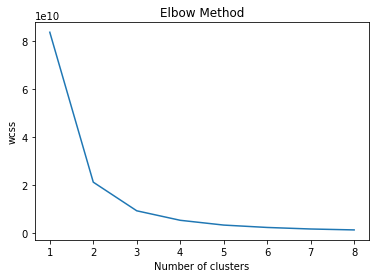

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,9),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [50]:
#Calculating the #silhoutte  coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#silhoutte co-efficent range is from -1 to 1 with 1 being best. It will tell how well clusters are separated

for n_cluster in range(2, 9):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6226136333751275
For n_clusters=3, The Silhouette Coefficient is 0.5919630020196457
For n_clusters=4, The Silhouette Coefficient is 0.5674460428071102
For n_clusters=5, The Silhouette Coefficient is 0.5638452827508184
For n_clusters=6, The Silhouette Coefficient is 0.5530278663166184
For n_clusters=7, The Silhouette Coefficient is 0.5511688229694827
For n_clusters=8, The Silhouette Coefficient is 0.5450509626891263


In [51]:
for k in range (1, 9):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 83584788456.58617
k: 2  cost: 21188843710.40421
k: 3  cost: 9271155928.671001
k: 4  cost: 5321153139.057068
k: 5  cost: 3329329257.9945846
k: 6  cost: 2340244808.508375
k: 7  cost: 1699666315.0200984
k: 8  cost: 1314717698.7292495



In [52]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

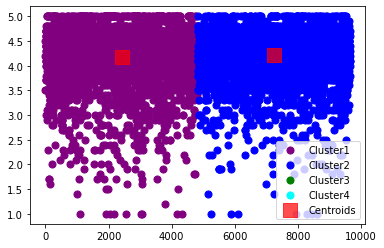

In [53]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#plt.title('Customer segments')
#plt.xlabel('Annual income of customer')
#plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

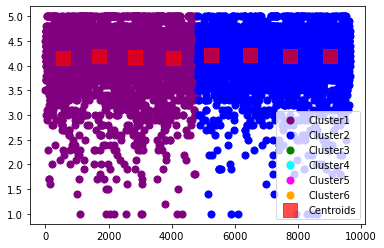

In [54]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#plt.title('Customer segments')
#plt.xlabel('Annual income of customer')
#plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [55]:
###############################################################################################################

In [56]:
##################################          Decision Tree          ############################################

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6955,0,4.1,159,19.0,10000,0,0.0,1,9,7-Jan-18,1.0.0,4.0.3 and up
1,2630,0,3.9,967,14.0,500000,0,0.0,1,12,15-Jan-18,2.0.0,4.0.3 and up
2,8648,0,4.7,87510,8.7,5000000,0,0.0,1,9,1-Aug-18,1.2.4,4.0.3 and up
3,7819,0,4.5,215644,25.0,50000000,0,0.0,3,9,8-Jun-18,Varies with device,4.2 and up
4,7014,0,4.3,967,2.8,100000,0,0.0,1,11,20-Jun-18,1.1,4.4 and up


In [59]:
df3 = df.drop(columns= 'Last Updated')

In [60]:
df3 = df3.drop(columns= 'Current Ver')

In [61]:
df3 = df3.drop(columns= 'Android Ver')

In [62]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6955,0,4.1,159,19.0,10000,0,0.0,1,9
1,2630,0,3.9,967,14.0,500000,0,0.0,1,12
2,8648,0,4.7,87510,8.7,5000000,0,0.0,1,9
3,7819,0,4.5,215644,25.0,50000000,0,0.0,3,9
4,7014,0,4.3,967,2.8,100000,0,0.0,1,11


In [63]:
df3['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [64]:
df3['Rating'].describe()

count    10829.000000
mean         4.192945
std          0.479046
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [65]:
# Size: Strip k and m and change the type to float64
series_rating = pd.Series(df3['Rating']) 

for i in range(len(series_rating)):
    if series_rating[i] >= 4.0:
        series_rating[i] = 1
    else:
        #for the case that says varies with device
        series_rating[i] = 0    

In [66]:
df3['Rating'].value_counts()

1.0    8832
0.0    1997
Name: Rating, dtype: int64

In [67]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6955,0,1.0,159,19.0,10000,0,0.0,1,9
1,2630,0,0.0,967,14.0,500000,0,0.0,1,12
2,8648,0,1.0,87510,8.7,5000000,0,0.0,1,9
3,7819,0,1.0,215644,25.0,50000000,0,0.0,3,9
4,7014,0,1.0,967,2.8,100000,0,0.0,1,11


In [68]:
df3 = df3[['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Rating']]

In [69]:
df3.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating
0,6955,0,159,19.0,10000,0,0.0,1,9,1.0
1,2630,0,967,14.0,500000,0,0.0,1,12,0.0
2,8648,0,87510,8.7,5000000,0,0.0,1,9,1.0
3,7819,0,215644,25.0,50000000,0,0.0,3,9,1.0
4,7014,0,967,2.8,100000,0,0.0,1,11,1.0


In [70]:
# Select targets for training and testing datasets
X = df3.values[:, 0:8]
Y = df3.values[:, 9]
print(X.shape)
print(Y.shape)

(10829, 8)
(10829,)


In [71]:
### Split into Train and Test #######
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7580, 8)
(3249, 8)
(7580,)
(3249,)


In [73]:
#create Decision Tree without Cross Validation 
cdt = DecisionTreeClassifier(random_state= 50)
cdt = cdt.fit(X_train, y_train)

[Text(523.0636251508226, 400.6706896551724, 'X[2] <= 36089.5\ngini = 0.298\nsamples = 7580\nvalue = [1379, 6201]'),
 Text(254.55804107809143, 386.6120689655172, 'X[4] <= 750.0\ngini = 0.356\nsamples = 5377\nvalue = [1246, 4131]'),
 Text(29.465346534653467, 372.5534482758621, 'X[2] <= 1.5\ngini = 0.135\nsamples = 1281\nvalue = [93, 1188]'),
 Text(9.110995310057321, 358.4948275862069, 'X[2] <= 0.5\ngini = 0.027\nsamples = 585\nvalue = [8, 577]'),
 Text(8.33559145388223, 344.4362068965517, 'gini = 0.0\nsamples = 410\nvalue = [0, 410]'),
 Text(9.886399166232414, 344.4362068965517, 'X[0] <= 5526.5\ngini = 0.087\nsamples = 175\nvalue = [8, 167]'),
 Text(6.590932777488275, 330.3775862068966, 'X[1] <= 28.5\ngini = 0.048\nsamples = 123\nvalue = [3, 120]'),
 Text(4.6524231370505476, 316.3189655172414, 'X[7] <= 2.0\ngini = 0.034\nsamples = 114\nvalue = [2, 112]'),
 Text(3.101615424700365, 302.2603448275862, 'X[1] <= 5.0\ngini = 0.019\nsamples = 105\nvalue = [1, 104]'),
 Text(2.3262115685252738, 2

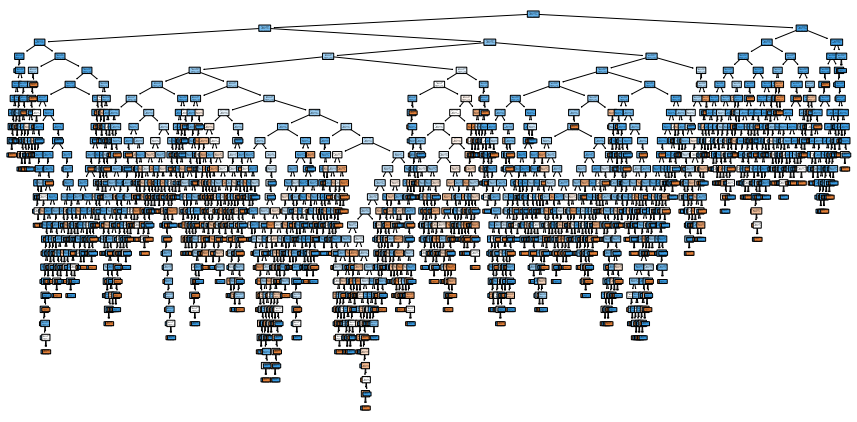

In [74]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(cdt, filled=True, rounded=True)

In [75]:
#Create Decision Tree using max_depth optimization as determined from Cross Validation

#cdt = DecisionTreeClassifier(criterion = "entropy", random_state= 50,max_depth=3, min_samples_leaf=5)

cdt = DecisionTreeClassifier(random_state= 50, max_depth = 5)
cdt.fit(X_train, y_train)

cdt_low = DecisionTreeClassifier(random_state= 50, max_depth = 4)
cdt_low.fit(X_train, y_train)

cdt_high = DecisionTreeClassifier(random_state= 50, max_depth = 6)
cdt_high.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [76]:
y_pred = cdt.predict(X_test)

y_pred_low = cdt_low.predict(X_test)

y_pred_high = cdt_high.predict(X_test)

In [77]:
y_pred.astype(int)

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
from sklearn.metrics import accuracy_score, f1_score
#print("Train F1 Score ", f1_score(y_train, y_pred)*100)
print("Accuracy for Optimal: ", accuracy_score(y_test, y_pred)*100)

print("Accuracy for Less Depth: ", accuracy_score(y_test, y_pred_low)*100)

print("Accuracy for More Depth: ", accuracy_score(y_test, y_pred_high)*100)

Accuracy for Optimal:  81.04032009849185
Accuracy for Less Depth:  81.00954139735303
Accuracy for More Depth:  80.1785164666051


[Text(716.1830357142857, 996.6, 'X[2] <= 36089.5\ngini = 0.298\nsamples = 7580\nvalue = [1379, 6201]'),
 Text(330.0669642857143, 815.4000000000001, 'X[4] <= 750.0\ngini = 0.356\nsamples = 5377\nvalue = [1246, 4131]'),
 Text(137.00892857142856, 634.2, 'X[2] <= 1.5\ngini = 0.135\nsamples = 1281\nvalue = [93, 1188]'),
 Text(49.82142857142857, 453.0, 'X[2] <= 0.5\ngini = 0.027\nsamples = 585\nvalue = [8, 577]'),
 Text(24.910714285714285, 271.79999999999995, 'gini = 0.0\nsamples = 410\nvalue = [0, 410]'),
 Text(74.73214285714286, 271.79999999999995, 'X[0] <= 5526.5\ngini = 0.087\nsamples = 175\nvalue = [8, 167]'),
 Text(49.82142857142857, 90.59999999999991, 'gini = 0.048\nsamples = 123\nvalue = [3, 120]'),
 Text(99.64285714285714, 90.59999999999991, 'gini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(224.19642857142856, 453.0, 'X[3] <= 0.92\ngini = 0.214\nsamples = 696\nvalue = [85, 611]'),
 Text(174.375, 271.79999999999995, 'X[6] <= 4.49\ngini = 0.456\nsamples = 37\nvalue = [13, 24]'),
 

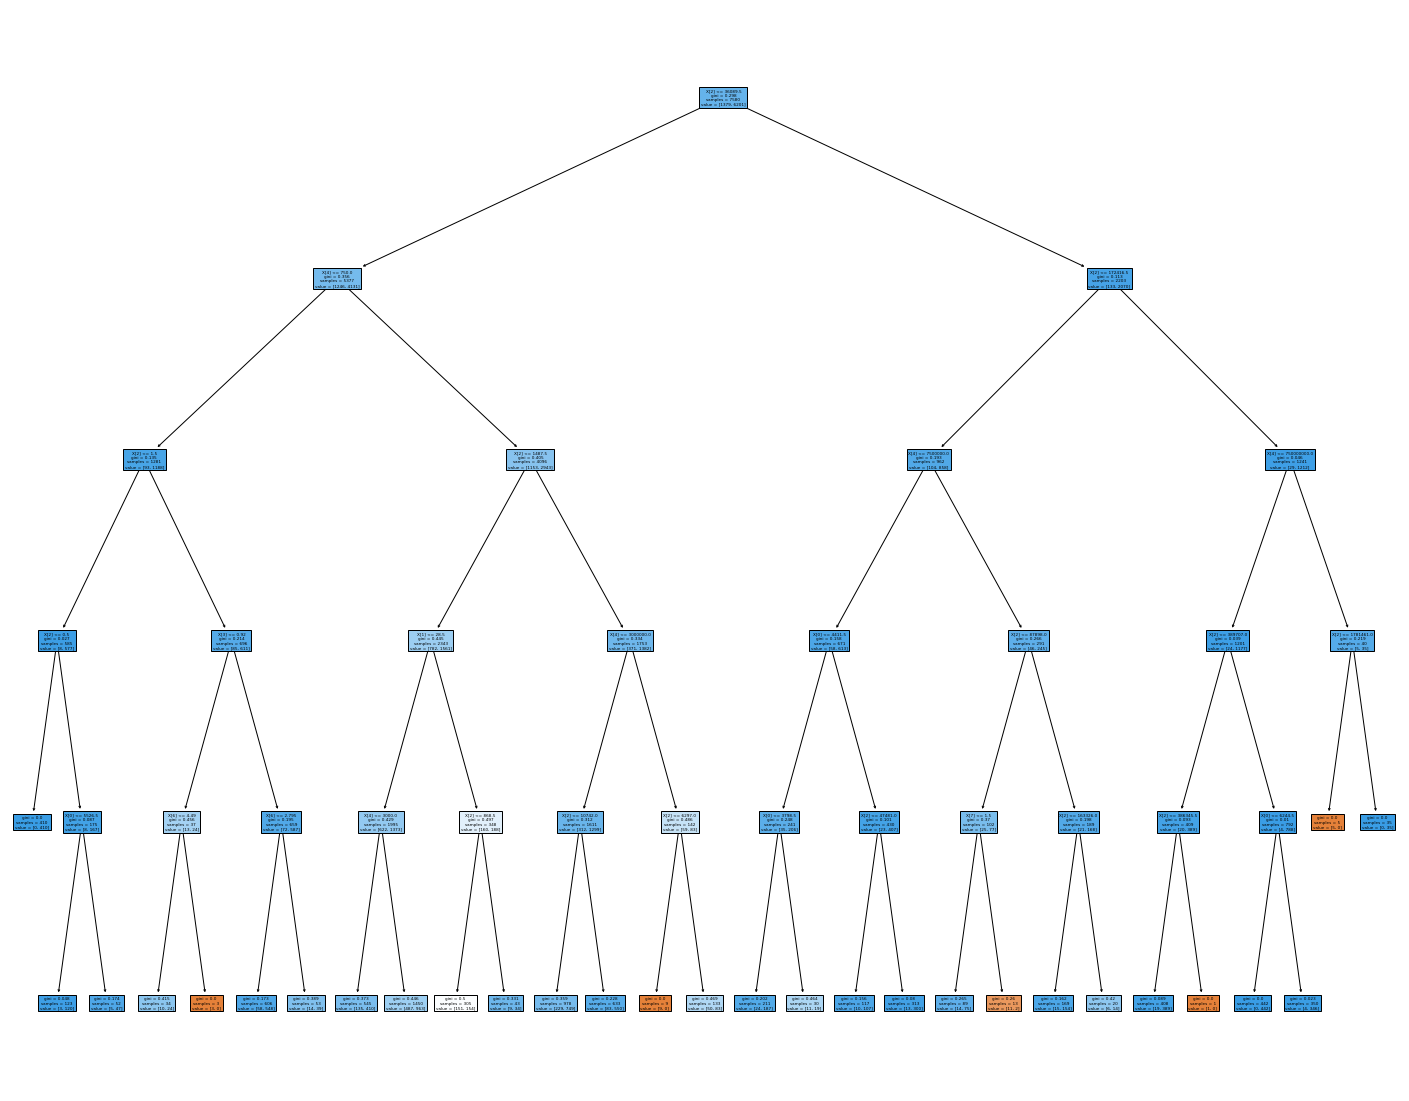

In [79]:
plt.figure(figsize=(25,20))
tree.plot_tree(cdt, filled=True)

In [80]:
##################################          Random Forest          ############################################

In [81]:
features = ['App', 'Category','Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']
#features.extend(category_list)
X = df[features]
y = df['Rating']

[(10, 0.08671084987505173),
 (20, 0.11766483863473476),
 (30, 0.1444128230405488),
 (40, 0.12800070862028978),
 (50, 0.14102983005694336),
 (60, 0.13890882739658406),
 (70, 0.14154606817534243),
 (80, 0.14716979702883515),
 (90, 0.14267118356878616),
 (100, 0.13748727288782936),
 (110, 0.14885791985331265),
 (120, 0.14680267953034987),
 (130, 0.13957831257287978),
 (140, 0.14900768571831613),
 (150, 0.15318786081678815),
 (160, 0.15479295773594626),
 (170, 0.14623687687933007),
 (180, 0.15911544324618798),
 (190, 0.15190901970422632)]

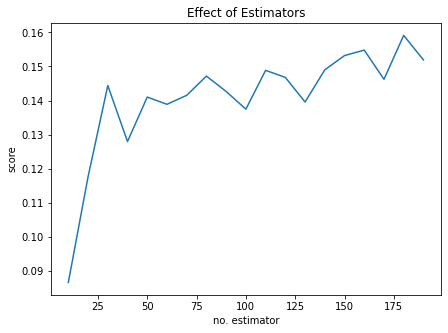

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
score_array = []
for x in estimators:
    model.set_params(n_estimators=x)
    model.fit(X_train, y_train)
    score_array.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, score_array)
results = list(zip(estimators,score_array))
results

In [83]:
from sklearn import metrics
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.2776591774858121)

In [84]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.19993095393969662)

In [85]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4471363929940132)

In [86]:
##################################          K-Nearest        ############################################

In [94]:
from sklearn.neighbors import KNeighborsRegressor

# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

In [96]:

model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [97]:
y_pred = model.predict(X_test)

In [100]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.2%'

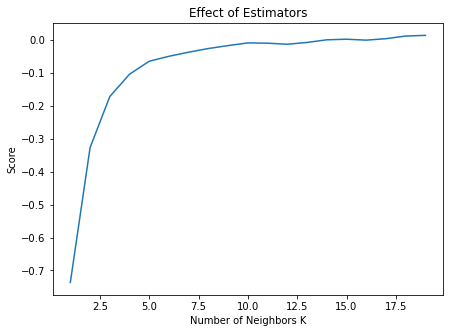

In [101]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)